# Introduction

For a model to be available for usage, it needs to be deployed. This  simply means making your trained model available on a server for querying. If its a sentiment analysis  model, then input of a sentence should be  able to generate either a negative or  positive score/sentiment. This is dependent on the trained model validation scores. Remember the  validations scores in previous  notebooks?

# Model Training


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
stop = stopwords.words('english')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Google Colab Specific to access the location with the notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Torrens/Deployment/

/content/drive/My Drive/Torrens/Deployment


In [ ]:
# Read the datase. Pandas package is  quite  helpful here. I'll write it as function
dataset_columns = ["target", "ids", "date", "flag", "user", "text"] #dataset columns
def read_data():
    dataset = pd.read_csv("sentiments.csv", encoding = "ISO-8859-1", names=dataset_columns) # Enter your file location
    dataset.drop_duplicates(inplace=True)
    dataset = dataset[dataset['text'].isnull() == False]
    dataset.reset_index(inplace=True)
    dataset.drop('index', axis=1, inplace=True)
    print ('Dataset loaded with shape', dataset.shape  )
    return dataset

dataset = read_data() #Call the function defined above

Dataset loaded with shape (1600000, 6)


In [ ]:
#this  will take sometime  on a slow computer to clean the text part of the tweet
dataset['text'] = dataset['text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x))) #remove numbers. Not  o interest in this aspect
dataset['text'] = dataset['text'].map(lambda x:re.sub('http.*','',str(x))) #Remove  hyperlinks
dataset['text'] = dataset['text'].map(lambda x:re.sub(r'#','',str(x))) #Remove hashtags. Not of  interest
dataset['text'] = dataset['text'].map(lambda x:re.sub(r'@\w*','',str(x))) #Remove user mentions
dataset['text'] = dataset['text'].map(lambda x:str(x).lower()) #lower case everything
dataset['text'] = dataset['text'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 3)) #Remove words with less than characters
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #Stop word removal. Uses the defined NLTK stopword list defined above


In [ ]:
dataset = dataset[["target","text"]]

In [ ]:
dataset.head()

,target,text
0,0,switchfoot
1,0,upset update facebook texting might result sch...
2,0,kenichan dived many times ball managed save re...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving


In [ ]:
dataset["target"].replace({0: "negative", 1: "negative", 2: "negative", 3: "negative", 4: "positive"}, inplace=True)

In [ ]:
dataset.tail()

,target,text
1599995,positive,woke school best feeling ever
1599996,positive,thewdb cool hear walt interviews
1599997,positive,ready mojo makeover details
1599998,positive,happy birthday alll time tupac amaru shakur
1599999,positive,happy charitytuesday thenspcc sparkscharity sp...


In [ ]:
dataset["target"].replace({"negative":1, "positive": 2}, inplace=True)

In [ ]:
dataset.tail()

,target,text
1599995,2,woke school best feeling ever
1599996,2,thewdb cool hear walt interviews
1599997,2,ready mojo makeover details
1599998,2,happy birthday alll time tupac amaru shakur
1599999,2,happy charitytuesday thenspcc sparkscharity sp...


# Evaluation

In [ ]:
# Separate data and labels
X = dataset['text'] #training data
y = dataset['target'] #lables

# Using a hashing vectorizer to keep model size low
#cv = HashingVectorizer(stop_words='english', ngram_range=(1,2))
cv = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)
cv.fit(X)
X_fitted = cv.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_fitted, y, test_size=0.25, random_state=42)

# Linear SVM with SGD classifier
clf = LogisticRegression()
#clf = SGDClassifier(loss="hinge", tol=None, max_iter=30)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.75      0.67      0.70    199581
           2       0.70      0.77      0.73    200419

    accuracy                           0.72    400000
   macro avg       0.72      0.72      0.72    400000
weighted avg       0.72      0.72      0.72    400000



In [ ]:
y_pred

array([2, 2, 1, ..., 2, 2, 2])

Not  very good performance. More fine tuning neeeded but hey, this is  for  demonstration purposes.

## Confusion Matrix

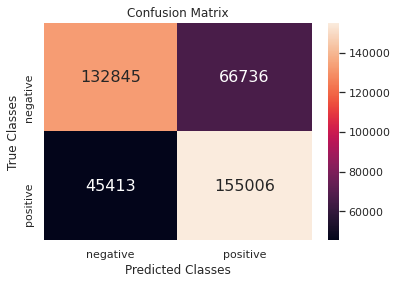

In [ ]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_matrix, range(2),range(2))

ax= plt.subplot()
sn.set(font_scale=1)
sn.heatmap(df_cm, ax = ax, annot=True,annot_kws={"size": 16}, fmt='g')

#Predicted and  true classes
ax.set_xlabel('Predicted Classes')
ax.set_ylabel('True Classes')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['negative', 'positive'])
ax.yaxis.set_ticklabels(['negative', 'positive'])
plt.show()

In [ ]:
# train test split
train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset['target'], random_state=312)

# get the shape of train and test split.
train.shape, test.shape

((1280000, 2), (320000, 2))

In [ ]:
# create a TF-IDF vectorizer object
tfidf_vec = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vec.fit(train.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pa

In [ ]:
# transform the train and test data
train_idf = tfidf_vec.transform(train.text)
test_idf  = tfidf_vec.transform(test.text)

In [ ]:
model = LogisticRegression() #Logistic  regression model
model.fit(train_idf, train.target)# fit the model with the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the label on the traning data
predict_train = model.predict(train_idf)

# predict the model on the test data
predict_test = model.predict(test_idf)

In [ ]:
print(classification_report(test.target, predict_test))

              precision    recall  f1-score   support

           1       0.75      0.67      0.70    160000
           2       0.70      0.77      0.73    160000

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



Low  validation scores


## Pipeline  Building
A machine learning pipeline remembers the complete set of preprocessing steps in the exact same order. So that whenever any new data point is introduced, the machine learning pipeline performs the steps as defined and uses the machine learning model to predict the target variable.


In [ ]:
# Pipeline  stages
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data
pipeline.fit(train.text, train.target)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterward...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),


In [ ]:
# sample tweet
text = ["I hate  it here"]

# predict the label using the pipeline

pipeline.predict(text)  #Not a very accurate model but we'll go ahead

array([1])

From the above output,

**Negative Prediction ==> 1**

**Positive Sentiment ===>2**

*Take  note of this as the predictions will either be one of the two options.*

# Saving  the  Model

In [ ]:
# import joblib
from joblib import dump

# dump the pipeline model. Will be stored in the same location as this notebook by default.
dump(pipeline, filename="classification_model.joblib")

['classification_model.joblib']

In [ ]:
from joblib import load

# sample tweet text
text = ["I hate  it here"]

# load the saved model
pipeline = load("classification_model.joblib")

# predict on the sample tweet text
pipeline.predict(text) #Works the same way

array([1])

The pipeline is the one to be  transferred to a remote server for deployment. The same can be done locally but if  one has Ubuntu. The below instructions are ideal for Windows users accessing files on a Linux server (Ubuntu).

# Test Data

To test the model online, we'll use the below dataset that I went through myself.

In [ ]:
tweets = pd.read_csv("test.csv", encoding = "ISO-8859-1")

In [ ]:
tweets

,date,text
0,30/04/2020,RT @JohnGGalt: Amazingafter years of attackin...
1,30/04/2020,RT @vooda1: CNN Declines to Air White House Pr...
2,30/04/2020,THANK YOU @CNN FOR NOT LEGITIMI
3,30/04/2020,RT @Muheeb_Shawwa: Donald J. Trump's speech so...
4,30/04/2020,POTUS plans new deal for UK as Theresa May to ...
5,30/04/2020,president since inauguration .@realdonaldtrump...
6,30/04/2020,Another #DearDonaldTrump Letter worth a read @...
7,30/04/2020,RT @Slate: Donald Trumps administration: Gov...
8,30/04/2020,"RT @RVAwonk: Trump, Sean Spicer, et al. lie fo..."
9,30/04/2020,Their lies are not just lies. Their lies are a...


The  first half are largely positive if you go through them and the  last half negative.

# Deployment

Deploying a model needs  interaction of the below:-

1. Trained Model and  relayed code in Python
2. The front-end  which is an HTML file
3. Flask web application framework  written in Python. It makes it  easy for  Web developers to write code in Python without having  to worry about the  underlying details e.g. protocols  etc.

## Environment Setup

As mentioned earlier, the setup works great on a Linux  Machine. Ubuntu 16.04 is the server of  choice here. For  the Windows users wishing to run this, its  possible.  Open Microsoft Store on your computer. Just type "microsoft store" in the  search box  next to the start button and click on it to open. In the search box  inside MS Store, type  Ubuntu and  search for version 16.04. Click on it  to install. Its that straightforward. You'll be able to run the  two operating systems though Windows will always be the host. This means that you can only run Ubuntu when Windows is on.

## Create Conda or  Virtual Enviroments in Python

It's always a good idea to create an environment where all Python packages that you need reside and only work inside it. This will make it  possible to comfortably use two Python versions on the same computer.

Two ways to create  environments:-

```
1. Python Virtual Environments (venv) - Documentation can be found https://docs.python.org/3/tutorial/venv.html (30th April 2020).
2. Conda  Virtual Enviromnets - Documentation is in this link https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html (Extracted on 30th April 2020)
```

**Syntax Conda Environment with Python 3.6:**

```
conda create -n enivironment_name python=3.6
```

## Install Flask and  Other Packages

```
pip install Flask
```
That's it. Remember to install as below  if  user rights  are needed before installation.

```
sudo apt-get install Flask
```
Remember to install other packages the same way. These include *joblib, pandas* and *sklearn*. They'll be very handy.




# Files

You'll need to create a few files for a deployment to be successful. In our case, the below files are available:-

1. HTML file  
2. Python file to pass test tweets through the module to get sentiments.

## HTML file  

This is the front end of  the website. You can download it as it is  here and transfer it to your server. Always good to create a separate folder in your Linux root folder. Handy when you have several web applications running.   The  body section of the template is  as below. Basically is a form that triggers checking of test data and subsequent predictions from the model. The file can be  downloaded [**here**](https://drive.google.com/open?id=1MBKCfQp8_myjx7JMQ-adLQI0xBGcoL4a).

```
<body>

<div class="topnav">
  <a class="active" href="#home">Home</a>
  <div class="search-container">
     <form action = "http://localhost:5000/" method = "post">
      
	  <input type="text" value="tweets" name="search">
      <button type="submit"><i class="fa fa-search"></i></button>
    </form>
  </div>
</div>

<div style="padding-left:16px">
  <h2> Sentiment Analysis Model  on Tweets </h2>
  <p> A test set of a few tweets will be  added the moment you click search. Type  anything  in the search  area and/or click on search.</p>
  <p> For tweets with a positive  sentiment, the score will be 2 and  for negative will be 1. Thats how the model was set up </>
</div>

</body>
```




## Get Predictions

The  second file is a Python file that runs on the Flask framework to service requests from the HTML file above. The below code. Full code can be downloaded [**here**](https://drive.google.com/open?id=1RsiOkbzf6tZ6_X9kJiKOtrHPwpoczZHO).


```
from flask import Flask, render_template, request, redirect, url_for
from joblib import load
import pandas  as  pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from joblib import load

pipeline = load("classification_model.joblib") # Saved Model

def requestResults(name):

    tweets = pd.read_csv("test.csv",encoding = "ISO-8859-1") #test tweets
    tweets['prediction'] = pipeline.predict(tweets['text'])#make predictions
    data = str(tweets.prediction.value_counts()) + '\n\n'
    return data + str(tweets)

app = Flask(__name__)

@app.route('/') #Flask code that reroutes to the HTML homepage
def home():
    return render_template('home.html')

@app.route('/', methods=['POST', 'GET'])
def get_data(): # Function to get the test data and  pass to the predictions  module. Details are passed from the HTML form.
    if request.method == 'POST':
        user = request.form['search']
        return redirect(url_for('success', name=user))


@app.route('/success/<name>')
def success(name):
    return "<xmp>" + str(requestResults(name)) + " </xmp> "


if __name__ == '__main__' :
    app.run(debug=True)
```



# Running the Model

To run the entire framework, simply call the above Python file. Remember it will work best inside the  environment you created. The code below illustrates this. *flask_env* is the name of  the environment. Can be  any name.*web_app* is the folder that all files are in and *get_sentiment.py* is the Python  file with the above code.

```
(flask_env) xxxxx@LAPTOP-D5BC9SCH:~/web_app$ python get_sentiment.py

```

Output  should  be  something like the below:-
![Running Flask](https://drive.google.com/uc?id=1zP_99PKR-FkgqpNa0pTZwmu_w69u7C2H)

This means  your  Flask is working. Accessing the front  end  needs input of the localhost address in a web browser.  The port is 5000 in this case. Its specified  in the  HTML file too. Localhost address is  below:-

```
http://127.0.0.1:5000/
```
Output in the browser is  expected to be something like this.

![Front end  output](https://drive.google.com/uc?id=1SuBTz7mtpdgNHhKqXVEHIrsNS0v3-EQX)

Clicking the search button in the top right corner should  give you the below.

![Final Output](https://drive.google.com/uc?id=18LNivWvq9wXFRdZLKFXK43mvLbO0F6BE)

Getting  the screen as above shows the model is working and deployed. You can try it with your own test data  in place of  *test.csv*.

The  above process summarizes an end to end  data  analytics  pipeline. Gathering the data, cleaning it up, building a model and deploying it.